# Issue 7 -- Add waveform alignmet to match class

In [13]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from nrutils import scsearch,gwylm,physf,physhf
from nrutils.analyze.match import match as match_object
from nrutils.core.units import *
from kerr import *
from matplotlib.pyplot import *
from numpy import array,pi
import lalsimulation as lalsim
# Let the people know which lalsim
alert('We are getting lalsimulation from %s'%(yellow('"%s"'%lalsim.__path__[0])))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(notebook)>> We are getting lalsimulation from "/Users/book/.virtual_enviroments/phenomhm/opt/lalsuite/lib/python2.7/site-packages/lalsimulation"


In [3]:
# Find an NR Simulation
a = scsearch(q=1,keyword='hrq',verbose=True)[0]

(scsearch)>> Found keyword (=hrq) keyword.
(scsearch)>> Found q (=1) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][bradwr] HRq-series: ns-q1.00	(D9_q1.0_a0.0_m160)



In [19]:
# Load the simulation data
y = gwylm(a,lmax=5,clean=True)

In [86]:
# Define high level functions for match object creation

#
M_Sol = 100.0
D_Mpc = 450.0
fmin = 30.0
fmax = 600.0

# NOTE that we define to template to be trivially shifted in orbital phase. 
# The alignment algorith we construct should recover this manual shift.
def signal_wfarr_fun(THETA,PHI,LM=None) :
    ans = physhf( y.recompose( THETA,PHI,kind='strain',domain='freq').fd_wfarr, M_Sol, D_Mpc )
    return ans
def template_wfarr_fun(THETA,PHI,LM=None) :
    ans = physhf( y.recompose( THETA,PHI+pi/3,kind='strain',domain='freq').fd_wfarr, M_Sol, D_Mpc )
    return ans

In [87]:

# Construct match object 
signal   = signal_wfarr_fun(pi/4,0)
template = template_wfarr_fun(pi/4,0)
mo = match_object( template, signal, fmin=fmin, fmax=fmax, signal_polarization=0, template_polarization=0, positive_f=True, psd_thing = lalsim.SimNoisePSDaLIGOZeroDetHighPower )


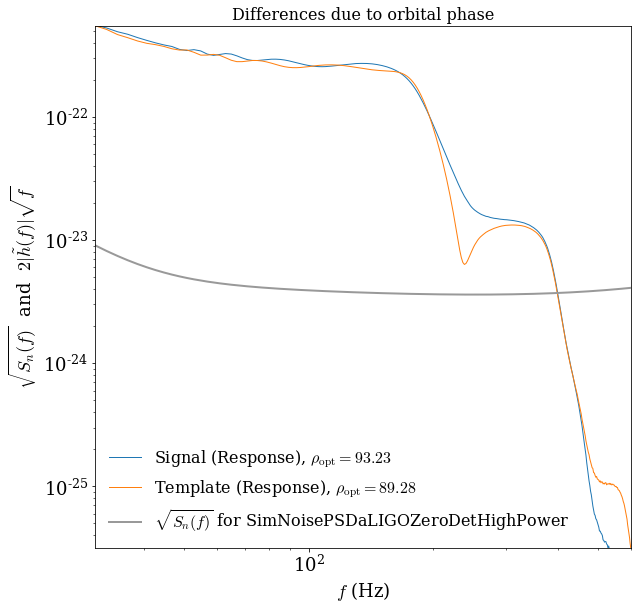

In [88]:
fig = mo.plot();
title('Differences due to orbital phase');

In [89]:
%time
# Optimize agreement over orbital phase
foo = mo.align_template(signal_theta=pi/6,signal_phi=0,signal_wfarr_fun=signal_wfarr_fun,template_wfarr_fun=template_wfarr_fun)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
(align_template)>> Applying the signal array according to input.
(align_template)>> Optimal template orbital phase: 5.23598564082
(align_template)>> Applying optimal orbital phase to this object's template.


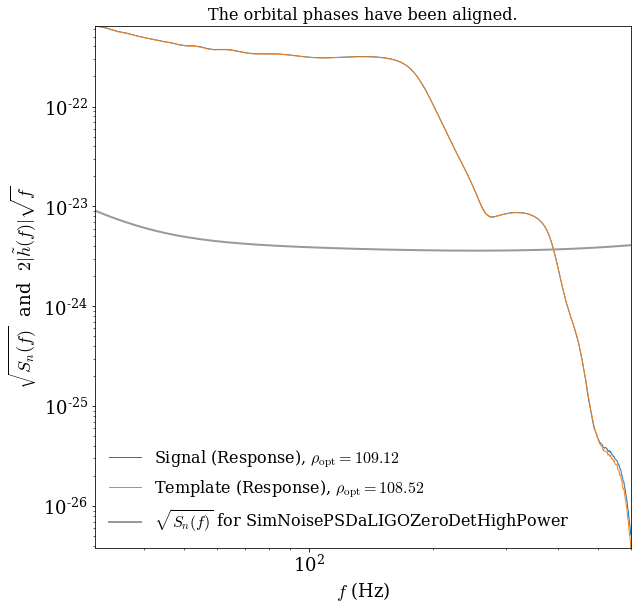

In [90]:
mo.plot();
title('The orbital phases have been aligned.');